In [20]:
from Scripts import loading as dl, profiling as pf, preprocessing as prep
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
amazon_link = '../Data/amazon_phone.pkl'
df = dl.load_sampled(amazon_link, 10000)

In [3]:
df[df['text'] == '']

,text,label


In [4]:
df[df.label.isnull()]

,text,label


In [5]:
pf.create_word_count(df)

,text,label,word_count
0,It took forever to receive these since they co...,1.0,44
1,It's a sleek looking case but not protecting. ...,1.0,27
2,I bought this for my wife's aunt she had this ...,1.0,37
3,I have been applying screen protectors to devi...,1.0,390
4,It didn't fit my samsung s but it did fit my b...,1.0,26
...,...,...,...
49995,so far i had it for a month and mo scratches.w...,5.0,63
49996,"I love it! its cute, small and simple. and the...",5.0,22
49997,After trying several screen protectors for my ...,5.0,33
49998,This power bank from Ravpower in my eyes is a ...,5.0,240


In [6]:
pf.get_longest_review(df)

The longest review text in our sample has 4178 words.
Longest review text:

42897    I own the LG G2 and it is a replacement for my...
Name: text, dtype: object 42897    5.0
Name: label, dtype: float64


In [7]:
pf.get_shortest_review(df)

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 4 times.
1161       cheap
9024      Cheap!
45511    Perfect
46705      Works
Name: text, dtype: object 1161     1.0
9024     1.0
45511    5.0
46705    5.0
Name: label, dtype: float64


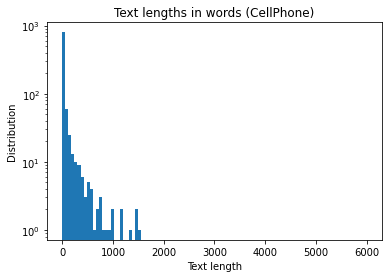

In [8]:
pf.get_word_length_dist(df, 'CellPhone', True)

In [9]:
# PREPROCESSING
df.text = prep.preprocess_reviews(df.text)

In [10]:
df.iloc[100].text

'phone case aw excit get mail open broken never order seller aw'

In [ ]:
# classifier = LogReg, LinearSVC,
# Feature selection: selectkbest (f_regression, mutual_info_regression, f_classif,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=7, stratify=df.label)

# vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
vectorizer = CountVectorizer(min_df=5,max_df=0.9, ngram_range=(1,3))

train_vectorized = vectorizer.fit_transform(X_train)
vocab = vectorizer.get_feature_names()

print ("Feature size of TF-IDF: ", len(vocab))
test_vectorized = vectorizer.transform(X_test)

Feature size of TF-IDF:  74877


500
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.46712
Precision:0.44479480918685754
F1:0.42534599416610136
col_0   1.0  2.0  3.0  4.0   5.0
label                           
1.0    1951  145  140  105   159
2.0    1184  364  402  286   264
3.0     507  254  632  639   468
4.0     169  113  244  837  1137
5.0     106   41   56  242  2055
1000
Training and prediction done
Training target statistics: Counter({5.0: 7500, 3.0: 7500, 1.0: 7500, 4.0: 7500, 2.0: 7500})
Testing target statistics: Counter({3.0: 2500, 2.0: 2500, 1.0: 2500, 5.0: 2500, 4.0: 2500})
train: 75, text: 25
Accuracy:0.47808
Precision:0.45773336973588774
F1:0.45005975798789744
col_0   1.0  2.0  3.0  4.0   5.0
label                           
1.0    1857  273  165   79   126
2.0    1041  555  445  220   239
3.0     453  363  77

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\u

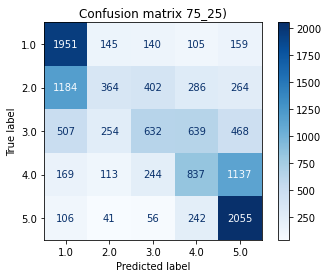

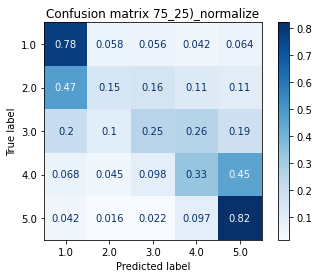

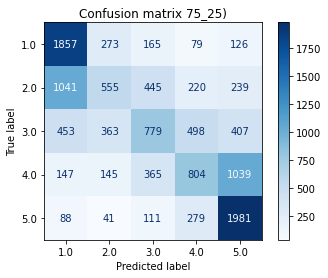

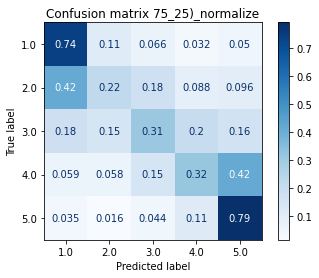

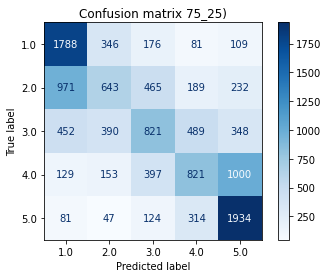

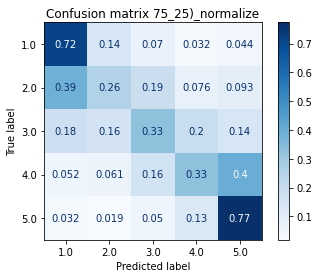

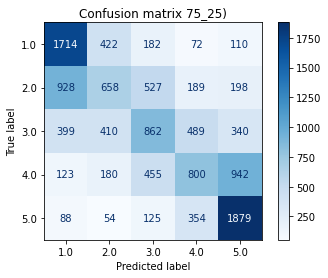

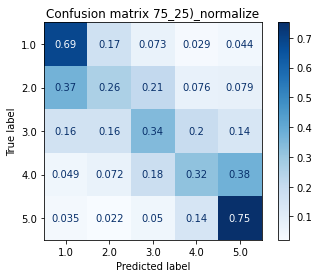

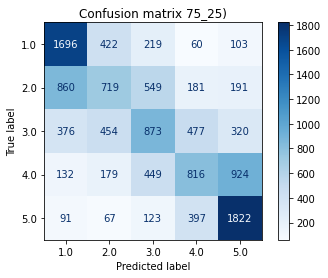

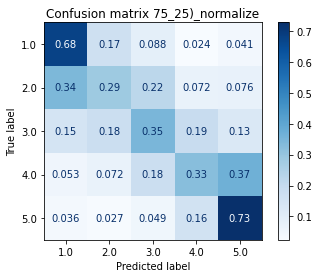

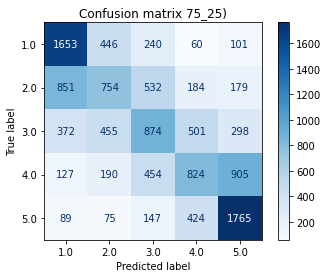

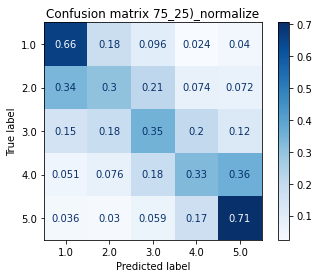

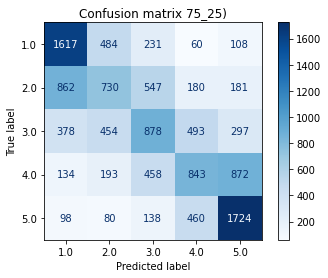

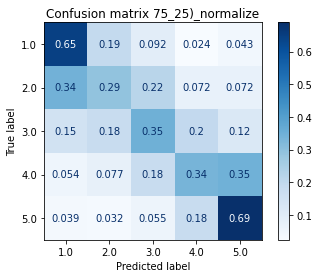

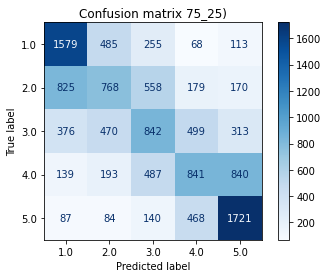

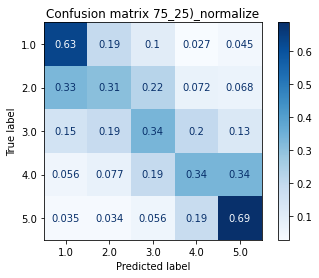

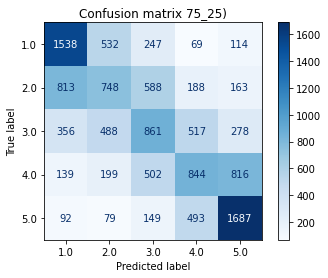

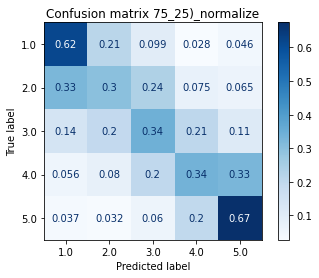

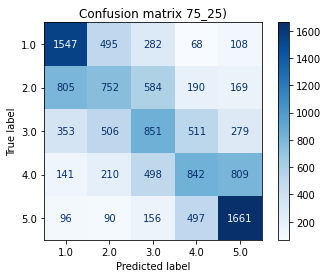

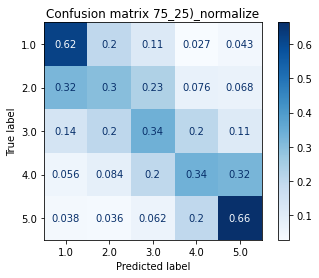

In [24]:
# vectorizer_chi2 = SelectKBest(chi2,k=3000)
lst = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for i in lst:
    vectorizer_fs = SelectKBest(score_func=f_classif, k=i)

    print(i)

    fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
    fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

    # Train the model using the training sets
    # clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')
    # clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', verbose=0, random_state=123, max_iter=1000)
    # clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=0.0001, multi_class='crammer_singer', fit_intercept=True, intercept_scaling=1, class_weight='balanced', verbose=0, random_state=123, max_iter=1000)
    # clf = MultinomialNB(class_prior=)

    clf.fit(fs_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(fs_test_vectorized)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: 75, text: 25")
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix 75_25)"
    disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()

In [14]:
# To check on individual features selection setting
# Get Top 10 most correlating Features after Feature Selection
import numpy as np
np.asarray(vectorizer.get_feature_names())[vectorizer_fs.get_support()]
top_ranked_features = sorted(enumerate(vectorizer_fs.scores_),key=lambda x:x[1])[:100]
top_ranked_features_indices = list(map(list,zip(*top_ranked_features)))[0]
for feature_pvalue in zip(np.asarray(vectorizer.get_feature_names())[top_ranked_features_indices], vectorizer_fs.pvalues_[top_ranked_features_indices]):
    print(feature_pvalue)

('abil keep', 1.0)
('abl answer', 1.0)
('abl charg one', 1.0)
('abl get phone', 1.0)
('abl play', 1.0)
('abl quickli', 1.0)
('abl see screen', 1.0)
('abl tell differ', 1.0)
('abl use case', 1.0)
('abus phone', 1.0)
('ac vent', 1.0)
('accentu', 1.0)
('accept but', 1.0)
('access but', 1.0)
('access usb', 1.0)
('accessori case', 1.0)
('accid drop phone', 1.0)
('accident turn', 1.0)
('account not', 1.0)
('across entir', 1.0)
('acto', 1.0)
('actual came', 1.0)
('actual find', 1.0)
('actual like case', 1.0)
('actual make phone', 1.0)
('actual otterbox', 1.0)
('actual press', 1.0)
('actual touch', 1.0)
('ad bulk not', 1.0)
('adapt anoth', 1.0)
('adapt dock', 1.0)
('adapt not come', 1.0)
('adapt still', 1.0)
('adapt usb', 1.0)
('adapt work fine', 1.0)
('add anyth', 1.0)
('add case', 1.0)
('add consider bulk', 1.0)
('add featur', 1.0)
('add grip', 1.0)
('add new', 1.0)
('add quit bit', 1.0)
('add screen', 1.0)
('add screen protector', 1.0)
('addit cabl', 1.0)
('addit devic', 1.0)
('addit functi